# Firstly: K-Nearest Neighbors

In [ ]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
# Importing the dataset
path="/content/drive/MyDrive/DataSet/final_data_colors.csv"
df=pd.read_csv(path)


Defining our data ( RGB values )

In [ ]:
x=np.array(df[['red','green','blue']])


Defining our Labels ( Target = Color names )

In [ ]:
y=np.array(df['label'])

Data Splitting using K-fold cross validation ( We can tune the test size here to get better accuracy )

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 25)
x_test.shape

(1011, 3)

 Training the model and finding the accuraccy ( We can also tune the K value to get better accuracy )



In [ ]:

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy=knn.score(x_test,y_test) * (100)
print(f'K-Nearest Neighbors: {accuracy:.2f}' ,end="" )
print("%")



In [ ]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       Black       0.67      0.67      0.67         9
        Blue       0.90      0.95      0.92       229
       Brown       0.83      0.83      0.83        92
       Green       0.93      0.92      0.93       276
        Grey       0.76      0.74      0.75        34
      Orange       0.71      0.81      0.76        43
        Pink       0.84      0.82      0.83        99
      Purple       0.83      0.84      0.84       108
         Red       0.90      0.78      0.83        55
       White       0.67      1.00      0.80         2
      Yellow       0.87      0.81      0.84        64

    accuracy                           0.87      1011
   macro avg       0.81      0.83      0.82      1011
weighted avg       0.87      0.87      0.87      1011



# Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = DecisionTreeClassifier( max_depth=10)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Print the accuracy
accuracy=accuracy_decision_tree*100
print(f'Decision Tree Accuracy: {accuracy:.2f}' ,end="" )
print("%")

print(classification_report(y_test,y_pred_decision_tree))


Decision Tree Accuracy: 82.29%
              precision    recall  f1-score   support

       Black       0.75      0.67      0.71         9
        Blue       0.89      0.92      0.90       229
       Brown       0.83      0.73      0.77        92
       Green       0.90      0.91      0.90       276
        Grey       0.54      0.59      0.56        34
      Orange       0.62      0.81      0.71        43
        Pink       0.76      0.79      0.77        99
      Purple       0.79      0.71      0.75       108
         Red       0.80      0.73      0.76        55
       White       0.50      0.50      0.50         2
      Yellow       0.79      0.75      0.77        64

    accuracy                           0.82      1011
   macro avg       0.74      0.74      0.74      1011
weighted avg       0.83      0.82      0.82      1011



# Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=400, max_depth=9)
random_forest.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred_random_forest = random_forest.predict(x_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the accuracy
accuracy=accuracy_random_forest*100
print(f'Random Forest Accuracy: {accuracy:.2f}' ,end="" )
print("%")
print(classification_report(y_test,y_pred_random_forest))


Random Forest Accuracy: 87.04%
              precision    recall  f1-score   support

       Black       0.70      0.78      0.74         9
        Blue       0.92      0.97      0.94       229
       Brown       0.86      0.76      0.81        92
       Green       0.94      0.93      0.93       276
        Grey       0.74      0.59      0.66        34
      Orange       0.71      0.81      0.76        43
        Pink       0.83      0.84      0.83        99
      Purple       0.82      0.83      0.83       108
         Red       0.88      0.80      0.84        55
       White       0.33      0.50      0.40         2
      Yellow       0.79      0.81      0.80        64

    accuracy                           0.87      1011
   macro avg       0.77      0.78      0.78      1011
weighted avg       0.87      0.87      0.87      1011



# Stacking Classifier

In [ ]:
# Stacking Classifier
from sklearn.ensemble import StackingClassifier

# Initialize base classifiers
estimators = [('knn', KNeighborsClassifier(n_neighbors= 10)), ('decision_tree', DecisionTreeClassifier(random_state=23))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

# Train the Stacking Classifier
stacking_clf.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred_stacking = stacking_clf.predict(x_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracy
accuracy=accuracy_stacking*100
print(f'Stacking Classifier: {accuracy:.2f}' ,end="" )
print("%")
print(classification_report(y_test,y_pred_stacking))

Stacking Classifier: 85.86%
              precision    recall  f1-score   support

       Black       0.86      0.67      0.75         9
        Blue       0.91      0.92      0.92       229
       Brown       0.87      0.75      0.81        92
       Green       0.91      0.94      0.93       276
        Grey       0.75      0.62      0.68        34
      Orange       0.72      0.84      0.77        43
        Pink       0.82      0.77      0.79        99
      Purple       0.79      0.83      0.81       108
         Red       0.82      0.82      0.82        55
       White       0.25      0.50      0.33         2
      Yellow       0.83      0.83      0.83        64

    accuracy                           0.86      1011
   macro avg       0.78      0.77      0.77      1011
weighted avg       0.86      0.86      0.86      1011



# Voting Classifier

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

# Initialize and train the Voting Classifier
voting_clf = VotingClassifier(estimators=[('knn', knn), ('decision_tree', decision_tree), ('random_forest', random_forest)], voting='hard') # hard voting: majority rule voting, soft voting: weighted average probabilities
voting_clf.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred_voting = voting_clf.predict(x_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)


# Print the accuracy
accuracy=accuracy_voting*100
print(f'Voting Classifier: {accuracy:.2f}' ,end="" )
print("%")
print(classification_report(y_test,y_pred_voting))

Voting Classifier: 87.44%
              precision    recall  f1-score   support

       Black       0.70      0.78      0.74         9
        Blue       0.91      0.97      0.94       229
       Brown       0.85      0.82      0.83        92
       Green       0.94      0.92      0.93       276
        Grey       0.80      0.71      0.75        34
      Orange       0.70      0.86      0.77        43
        Pink       0.82      0.82      0.82        99
      Purple       0.85      0.81      0.83       108
         Red       0.89      0.76      0.82        55
       White       0.67      1.00      0.80         2
      Yellow       0.84      0.80      0.82        64

    accuracy                           0.87      1011
   macro avg       0.81      0.84      0.82      1011
weighted avg       0.88      0.87      0.87      1011



# K-Means

The K-Means score is: 87.50%



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

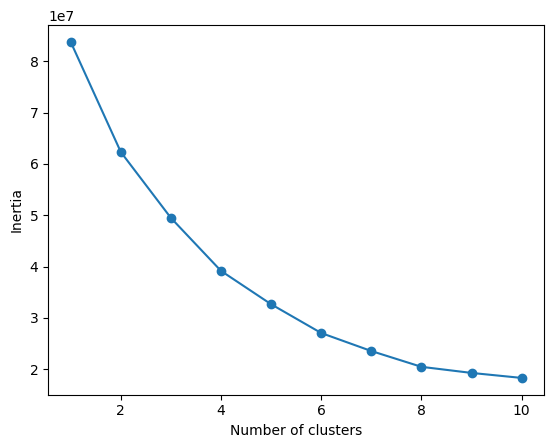

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Perform K-Means clustering
n_clusters = 5000  # Number of clusters based on the true labels
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=1000)
kmeans.fit(x)
y_pred = kmeans.labels_
print("The K-Means score is: %.2f" % (-kmeans.score(x)),end="")
print("%")
print()

# Add elbow method to find the optimal number of clusters
inertias = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

# Display the elbow plot
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
X=np.array(df[['red','green','blue']])
Y=np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
svm = SVC(kernel='rbf')  # Radial basis function kernel
svm.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred_SVM = svm.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_SVM) * (100)

print(f'Support Vector Classifier Accuracy: {accuracy:.2f}' ,end="" )
print("%")
# Classification report
report = classification_report(y_test, y_pred_SVM)
print("Classification Report:")
print(report)




Support Vector Classifier Accuracy: 90.21%
Classification Report:
              precision    recall  f1-score   support

       Black       0.61      0.92      0.73        12
        Blue       0.94      0.96      0.95       213
       Brown       0.86      0.86      0.86        74
       Green       0.97      0.95      0.96       315
        Grey       0.86      0.79      0.83        24
      Orange       0.79      0.77      0.78        48
        Pink       0.87      0.90      0.88       102
      Purple       0.88      0.83      0.86       108
         Red       0.87      0.75      0.81        53
       White       0.64      0.70      0.67        10
      Yellow       0.79      0.94      0.86        52

    accuracy                           0.90      1011
   macro avg       0.83      0.85      0.84      1011
weighted avg       0.91      0.90      0.90      1011

